In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
def load_and_preprocess_data(filepath):
    # Function to load and preprocess the data
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        print(f"Error: The file at {filepath} was not found.")
        exit()
    
    # Group items by member_number and date to create a list of items purchased together
    transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).tolist()
    
    return transactions

def apriori_analysis(transactions, min_support=0.001, min_confidence=0.05):
    # Function to run Apriori analysis and generate rules
    cleaned_transactions = []
    for transaction in transactions:
        cleaned_transactions.append([str(item) for item in transaction if pd.notna(item)])

    te = TransactionEncoder()
    te_array = te.fit(cleaned_transactions).transform(cleaned_transactions)
    df_te = pd.DataFrame(te_array, columns=te.columns_)

    frequent_itemsets = apriori(df_te, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    
    return frequent_itemsets, rules


In [4]:
def plot_frequent_itemsets(frequent_itemsets):
    # Function to plot frequent itemsets
    if len(frequent_itemsets) > 0:
        top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
        plt.figure(figsize=(10,6))
        plt.barh(top_itemsets['itemsets'].astype(str), top_itemsets['support'], color=sns.color_palette("YlGnBu", len(top_itemsets)))
        plt.xlabel('Support')
        plt.ylabel('Itemsets')
        plt.title('Top 10 Most Frequent Itemsets by Support')
        plt.show()
    else:
        print("Not enough frequent itemsets to plot.")

def plot_association_rules_scatter(rules):
    # Function to plot the scatter plot of association rules
    if len(rules) > 0:
        plt.figure(figsize=(8,6))
        if 'lift' in rules.columns and not rules['lift'].isna().all():
            scatter = sns.scatterplot(data=rules, x='support', y='confidence', size='lift', sizes=(20, 200), hue='lift', palette='coolwarm')
            plt.colorbar(scatter.collections[0], label="Lift")
        else:
            print("Warning: 'lift' column is missing or contains only NaN values.")
            scatter = sns.scatterplot(data=rules, x='support', y='confidence', size=10)
        plt.title("Association Rules Scatter Plot")
        plt.xlabel("Support")
        plt.ylabel("Confidence")
        plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough association rules to plot.")

def plot_rule_metrics_heatmap(rules):
    # Function to plot a heatmap of support, confidence, and lift correlations
    if len(rules) > 0:
        rule_metrics = rules[['support', 'confidence', 'lift']]
        plt.figure(figsize=(10,6))
        sns.heatmap(rule_metrics.corr(), annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Between Support, Confidence, and Lift of Association Rules')
        plt.show()
    else:
        print("Not enough association rules to plot heatmap.")

def plot_top_rules_by_lift(rules):
    # Function to plot top rules by lift
    if len(rules) > 0:
        top_rules_by_lift = rules.sort_values(by='lift', ascending=False).head(10)
        plt.figure(figsize=(10,6))
        plt.barh(top_rules_by_lift['antecedents'].astype(str), top_rules_by_lift['lift'], color=sns.color_palette("Reds", len(top_rules_by_lift)))
        plt.xlabel('Lift')
        plt.ylabel('Rule (Antecedent)')
        plt.title('Top 10 Rules with Highest Lift')
        plt.show()
    else:
        print("Not enough association rules to plot top rules by lift.")

def plot_support_distribution(rules):
    # Function to plot distribution of support values
    if len(rules) > 0:
        plt.figure(figsize=(8,6))
        sns.histplot(rules['support'], kde=True, color='purple', bins=30)
        plt.title('Distribution of Support Values in Association Rules')
        plt.xlabel('Support')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print("Not enough association rules to plot the support distribution.")


In [5]:
dataset_path = 'Groceries_dataset.csv'
transactions = load_and_preprocess_data(dataset_path)

# Run Apriori analysis
# Ayo, if you're not getting enough association rules, try adjusting the min_support and min_confidence values.
# Example: 
# - Increase min_support to 0.01 (10%) if you want fewer but stronger frequent itemsets.
# - Lower min_confidence to 0.02 (2%) if you want more but weaker association rules.

frequent_itemsets, rules = apriori_analysis(transactions, min_support=0.001, min_confidence=0.05)

# Display frequent itemsets and association rules
print("\nFrequent Itemsets:")
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: list(x))
print(frequent_itemsets.sort_values(by='support', ascending=False).head())

print("\nAssociation Rules:")
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x))
rules['consequents'] = rules['consequents'].apply(lambda x: list(x))
print(rules.sort_values(by='confidence', ascending=False).head())




Frequent Itemsets:
      support            itemsets
146  0.157923        [whole milk]
90   0.122101  [other vegetables]
109  0.110005        [rolls/buns]
123  0.097106              [soda]
147  0.085879            [yogurt]

Association Rules:
               antecedents   consequents  antecedent support  \
449      [yogurt, sausage]  [whole milk]            0.005748   
436  [rolls/buns, sausage]  [whole milk]            0.005347   
446        [soda, sausage]  [whole milk]            0.005948   
383  [semi-finished bread]  [whole milk]            0.009490   
442   [rolls/buns, yogurt]  [whole milk]            0.007819   

     consequent support   support  confidence      lift  representativity  \
449            0.157923  0.001470    0.255814  1.619866               1.0   
436            0.157923  0.001136    0.212500  1.345594               1.0   
446            0.157923  0.001069    0.179775  1.138374               1.0   
383            0.157923  0.001671    0.176056  1.114825        

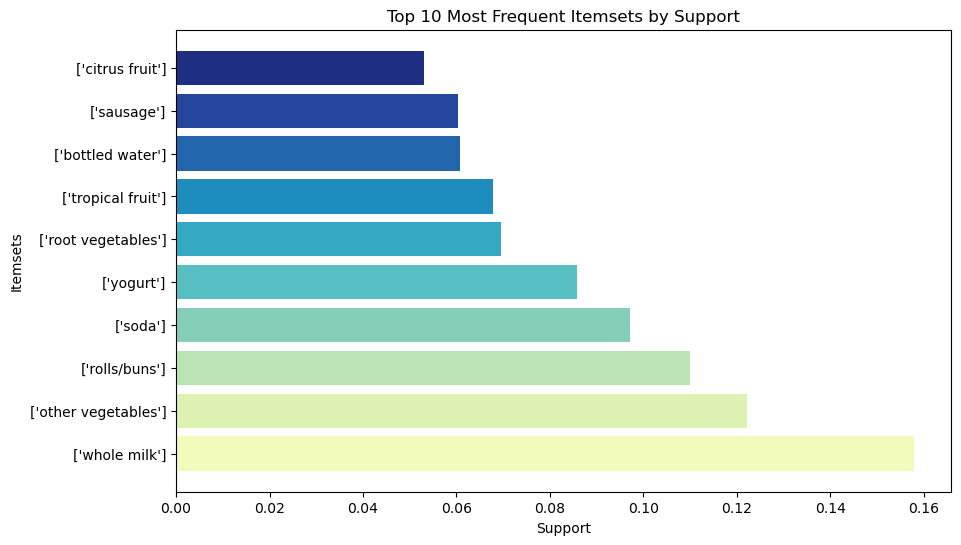

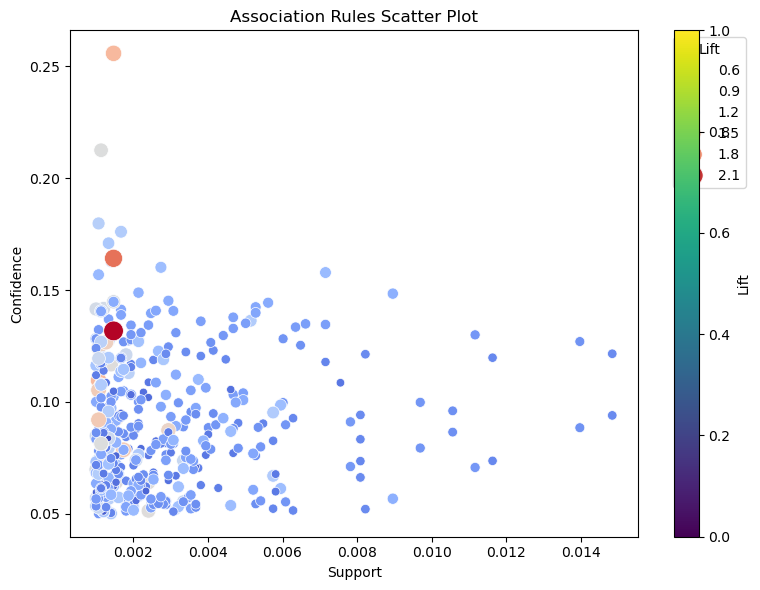

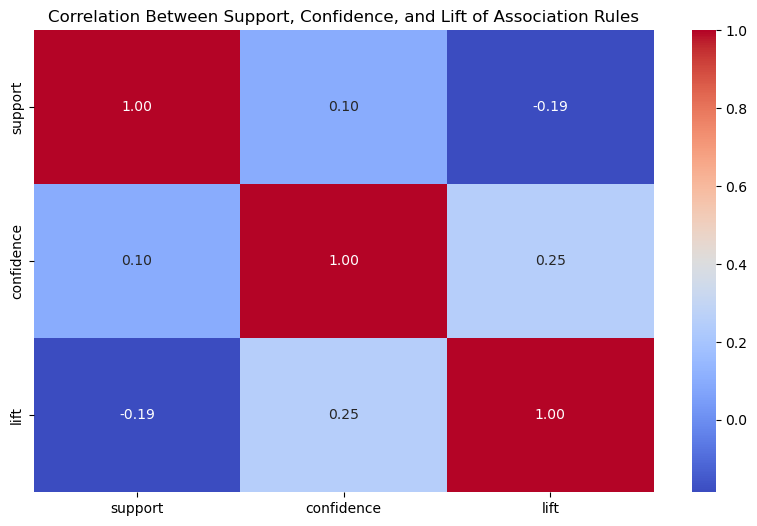

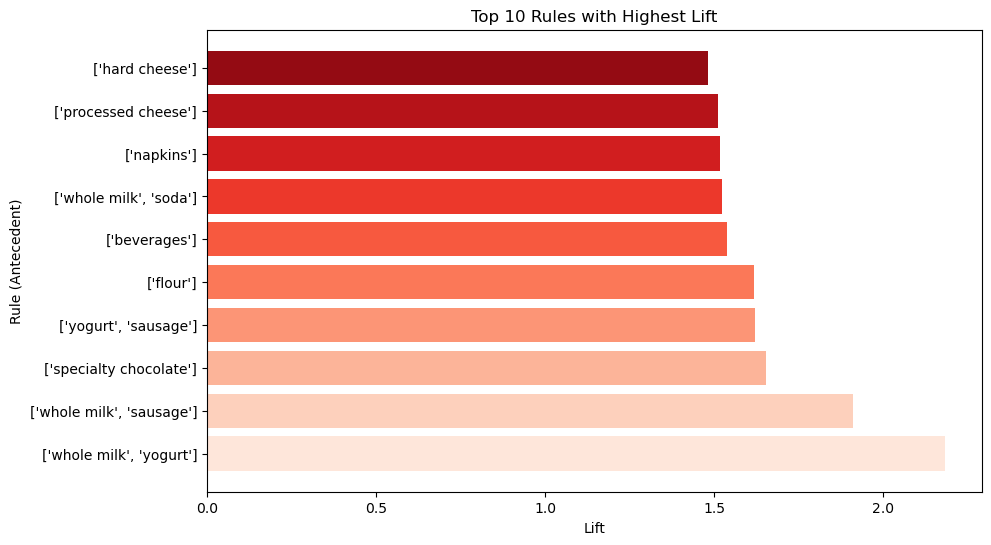

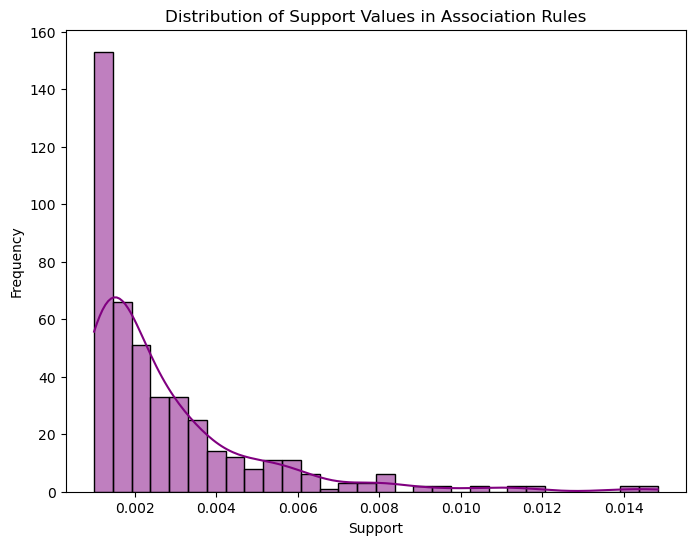

In [6]:
# Visualizations
plot_frequent_itemsets(frequent_itemsets)
plot_association_rules_scatter(rules)
plot_rule_metrics_heatmap(rules)
plot_top_rules_by_lift(rules)
plot_support_distribution(rules)
